In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

#import ipdb; ipdb.set_trace()

In [2]:
def classify():
    return "not implemented"

def get_score(y_test, y_pred, plot=True):
    precision, recall, _ = precision_recall_curve(y_test, y_pred[:,0])
    avg_precision = average_precision_score(y_test, y_pred[:,0])
    
    if plot:
        plt.clf()
        plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()
    
    return avg_precision

def fill_missing_data():
    return "not implemented"

In [23]:
if __name__ == "__main__":
    data = pd.read_csv("/home/kaushalya/Coding/wsdm_cup/vandalism/data/features100k.csv", encoding='utf-8',
                       header=0)
    labeled_data = pd.read_csv("/home/kaushalya/Coding/wsdm_cup/vandalism/data/wikidata-vandalism-corpus-2015/wdvc15-ground-truth.csv"
                            , encoding='utf-8', header=0)

number of rows: 99999
number of feaure columns: 119


In [26]:
    review_info = {'revisionId':int}
    
    #content features (27 features)
    character_features = {'groupId':float, 'itemId':float, 'alphanumericRatio':float,'asciiRatio':float,'bracketRatio':float,'digitRatio':float
                    ,'latinRatio':float,'longestCharacterSequence':float,'lowerCaseRatio':float
                    ,'nonLatinRatio':float,'punctuationRatio':float,'upperCaseRatio':float,'whitespaceRatio':float}    
    word_features = {'languageWordRatio':float, 'containsLanguageWord':bool, 'lowerCaseWordRatio':float, 
                     'longestWord':float, 'containsURL':bool, 'badWordRatio':float, 'proportionOfQidAdded':float, 
                     'upperCaseWordRatio':float, 'proportionOfLinksAdded':float}
    sentence_features = {'commentCommentSimilarity':float, 'commentLabelSimilarity':float, 'commentTailLength':float
                         ,'commentSitelinkSimilarity':float}
    statement_features = {'propertyFrequency':float, 'itemValueFrequency':float, 'literalValueFrequency':float}
    
    #contextual features (20 features)
    user_features = {'isPrivilegedUser':bool, 'isRegisteredUser':bool, 'isBotUser':bool}

    #TODO need to fins mapping column names for the following user features
    #'cumUserUniqueItems':float, 'userFrequency':float
            
    user_cat_features = [ 'userCity', 'userContinent', 'userCountry', 'userCounty', 'userRegion', 'userTimeZone']
    item_features = {'logCumItemUniqueUsers':float, 'logItemFrequency':float}
    revision_features = {'isLatinLanguage':bool, 'commentLength':float}
    revision_cat_features = ['revisionTag', 'revisionLanguage', 'revisionAction', 'revisionSubaction',
                             'positionWithinSession']
        
    print("number of rows: %d"%data.shape[0])
    print("number of feaure columns: %d"%data.shape[1]) 
    
    cat_features = []
    cat_features.extend(user_cat_features)
    cat_features.extend(revision_cat_features)

number of rows: 99999
number of feaure columns: 119


In [4]:
cat_features = []
cat_features.extend(user_cat_features)
cat_features.extend(revision_cat_features)

In [27]:
numerical_features = {}
numerical_features.update(review_info)
numerical_features.update(character_features)
numerical_features.update(word_features)
numerical_features.update(sentence_features)
#numerical_features.update(statement_features) 
numerical_features.update(user_features)
#numerical_features.update(item_features)
numerical_features.update(revision_features)

selected_feature_list = []
selected_feature_list.extend(numerical_features.keys())
selected_feature_list.extend(cat_features)

#numerical fields with '�' are replaced with -1 
selected_data = data[selected_feature_list]

#selected_data.loc[:,list(numerical_features.keys())] = selected_data.loc[:,list(numerical_features.keys())].replace(['�','NA'], -1, inplace=False)
selected_data = selected_data.replace(['�', 'NA'], -1, inplace=False)

for col in numerical_features.keys():
    selected_data[col] = selected_data[col].astype(numerical_features[col])

#replacing nan with -1
selected_data.loc[:,list(numerical_features.keys())] = selected_data.loc[:,list(numerical_features.keys())].fillna(-1,inplace=False) 

In [ ]:
%pdb

In [28]:
for col in cat_features:
    #print(col)
    selected_data[col] = selected_data[col].astype(str)

userCity
userContinent
userCountry
userCounty
userRegion
userTimeZone
revisionTag
revisionLanguage
revisionAction
revisionSubaction
positionWithinSession


In [29]:
selected_data.to_csv("/home/kaushalya/Coding/wsdm_cup/vandalism/data/features100k_preprocessed.csv")

In [30]:
#converting categorical variables into numerica lists
le = LabelEncoder()
#TODO pickle these columns

for col in cat_features:
    #print(col)
    selected_data[col] = le.fit_transform(selected_data[col])

userCity
userContinent
userCountry
userCounty
userRegion
userTimeZone
revisionTag
revisionLanguage
revisionAction
revisionSubaction
positionWithinSession


In [35]:
#using first 10k rows for training the model
training_rows = range(50000)

#initiaizing the RF classifier
clf = RandomForestClassifier(max_depth=8, n_estimators=100)

In [36]:
  x_train = selected_data.ix[training_rows,1:]
  y_train = labeled_data.ix[training_rows,'rollback_reverted']
  
#TODO grid search to set parameters of the model
  clf.fit(x_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [33]:
in_test = ~selected_data.index.isin(training_rows)
x_test = selected_data.ix[in_test,1:]
y_test = labeled_data.ix[in_test,'rollback_reverted']

In [54]:
y_pred = clf.predict_proba(x_test)
logloss_score = log_loss(y_test, y_pred)

#Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred[:,1])
avg_precision = average_precision_score(y_test, y_pred[:,1])

#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
print("average precision:%f"%avg_precision)
print("logloss score: %f"%logloss_score)

average precision:0.221969
logloss score: 0.063033


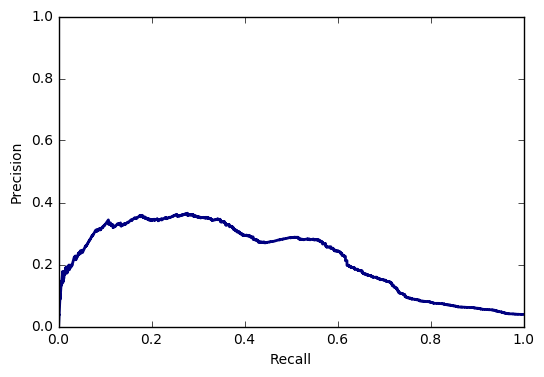

ROC-AUC score: 0.915095


In [53]:
plt.clf()
plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

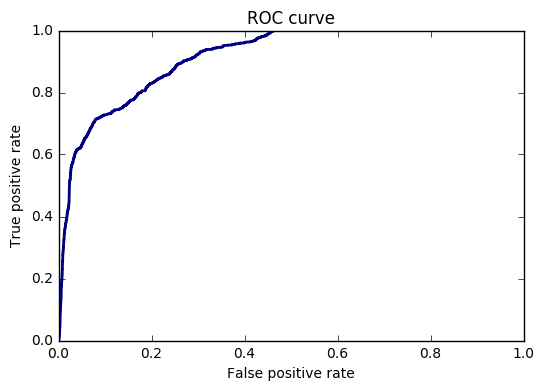

ROC-AUC score: 0.915095


In [56]:
#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
roc_score = roc_auc_score(y_test, y_pred[:,1])

plt.clf()
plt.plot(fpr, tpr, lw=2, color='navy', label='ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("ROC-AUC score: %f"%roc_score)